In [416]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
df = pd.read_csv("C:\\Users\\ierem\\Downloads\\train.csv",encoding='utf8')
df.shape

(45593, 20)

In [417]:
# drop duplicates if there is
df.drop_duplicates()
# let's see if the data has na values
df.isna().sum() 
#data has no na values, so it's good to go

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
dtype: int64

In [418]:
# let's remove 'conditions' from Weatherconditions column and '(min)' from Time_taken(min) column.
df['Weatherconditions'] = df['Weatherconditions'].str.replace('conditions ', '')
df['Time_taken(min)'] = df['Time_taken(min)'].str.lstrip('(min) ').astype('int')
df[["Weatherconditions","Time_taken(min)"]].head()

# and make sure all order dates are in the same datetime format and
# the delivery person ratings column is float type
df["Delivery_person_Ratings"] = df["Delivery_person_Ratings"].astype(float)
df["Order_Date"] = df["Order_Date"].apply(pd.to_datetime,infer_datetime_format=True)

# Now the data is cleaner and more useable, lets continue to explore the data

In [419]:
df_backup = df

In [420]:
# It seems there is trouble with dropna, so its been handled in a more traditional way :)
df.drop(df.loc[df['City']=='NaN '].index, inplace=True)
df0 = df.groupby(["City"])["ID"].count().reset_index(name="count")
df0.dropna(axis=0, inplace=True)
df0["%"] = 100 * df0['count']  / dfq['count'].sum()
df0.head()

#df = df.drop(df[df['City'] == 'NaN'].index)
#df.shape
#df[df['City'].str.contains("NaN")]

,City,count,%
0,Metropolitian,34093,76.798144
1,Semi-Urban,164,0.369428
2,Urban,10136,22.832429


In [421]:
# so lets see that in a pie chart
pieChart = px.pie(df0, values='%', names='City',  color_discrete_sequence=px.colors.qualitative.Set3)
pieChart.show()

# It seems its mostly people in Metropolitian areas which orders food on app.

In [422]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
geometry = [Point (xy) for xy in zip(df["Delivery_location_latitude"], df['Delivery_location_longitude'])]
geometry[:3]

[<POINT (22.765 75.912)>, <POINT (13.043 77.813)>, <POINT (12.924 77.688)>]

In [423]:
# lets categorize the delivery durations and see the results
df1 = df_backup
df1.loc[(df1['Time_taken(min)'] > 0) & (dft['Time_taken(min)'] <= 15), 'duration'] = "0-15"
df1.loc[(df1['Time_taken(min)'] > 15) & (dft['Time_taken(min)'] <= 30), 'duration'] = "15-30"
df1.loc[(df1['Time_taken(min)'] > 30) & (dft['Time_taken(min)'] <= 45), 'duration'] = "30-45"
df1.loc[(df1['Time_taken(min)'] > 45), 'duration'] = "45+"
df2 = df1.groupby(["duration","Type_of_vehicle"])["ID"].count().reset_index(name="count")
df2 = df2.sort_values(["duration","Type_of_vehicle"],ascending=True).reset_index()

df2

,index,duration,Type_of_vehicle,count
0,0,0-15,bicycle,9
1,1,0-15,electric_scooter,587
2,2,0-15,motorcycle,2283
3,3,0-15,scooter,2344
4,4,15-30,bicycle,34
5,5,15-30,electric_scooter,2250
6,6,15-30,motorcycle,14665
7,7,15-30,scooter,8800
8,8,30-45,bicycle,18
9,9,30-45,electric_scooter,847


In [424]:
# It will be much easier to distinguish the distribution in a bar chart
fig = px.bar( df2, x = "duration",   y ="count" , color = "Type_of_vehicle" , title="Vehicles of deliveries in a day")
fig.show()

# So it seems motorcycles are very widespread among the delivery vehicles
# Second place belongs to electric scooter which are prefered mostly in short range deliveries as it seems.
# The area of electric scooters almost equal to motorcycles' are in 0-15 min deliveries but the difference starts to
#increase when the delivery duration increases.

In [425]:
# lets categorize the stage of a day and see the results
df = df_backup
df.loc[(df['Time_Orderd'] > "08:00:00") & (df['Time_Orderd'] <= "10:00:00"), 'timezone'] = "early morning(8-10)"
df.loc[(df['Time_Orderd'] > "10:00:00") & (df['Time_Orderd'] <= "12:00:00"), 'timezone'] = "late morning(10-12)"
df.loc[(df['Time_Orderd'] > "12:00:00") & (df['Time_Orderd'] <= "14:00:00"), 'timezone'] = "early noon(12-14)"
df.loc[(df['Time_Orderd'] > "14:00:00") & (df['Time_Orderd'] <= "16:00:00"), 'timezone'] = "late noon(14-16)"
df.loc[(df['Time_Orderd'] > "16:00:00") & (df['Time_Orderd'] <= "18:00:00"), 'timezone'] = "early dinner(16-18)"
df.loc[(df['Time_Orderd'] > "18:00:00") & (df['Time_Orderd'] <= "20:00:00"), 'timezone'] = "dinner(18-20)"
df.loc[(df['Time_Orderd'] > "20:00:00") & (df['Time_Orderd'] <= "22:00:00"), 'timezone'] = "late dinner(20-22)"
df.loc[(df['Time_Orderd'] > "22:00:00") & (df['Time_Orderd'] <= "23:59:99"), 'timezone'] = "nightfood(22-0)"
df.loc[(df['Time_Orderd'] == "00:00:00"), 'timezone'] = "nightfood(22-0)"

# Stages will be sorted in the next step to make a clear view in the visual, so stages are indexed in according to do that
df.loc[(df['Time_Orderd'] > "08:00:00") & (df['Time_Orderd'] <= "10:00:00"), 'timeindex'] = "0"
df.loc[(df['Time_Orderd'] > "10:00:00") & (df['Time_Orderd'] <= "12:00:00"), 'timeindex'] = "1"
df.loc[(df['Time_Orderd'] > "12:00:00") & (df['Time_Orderd'] <= "14:00:00"), 'timeindex'] = "2"
df.loc[(df['Time_Orderd'] > "14:00:00") & (df['Time_Orderd'] <= "16:00:00"), 'timeindex'] = "3"
df.loc[(df['Time_Orderd'] > "16:00:00") & (df['Time_Orderd'] <= "18:00:00"), 'timeindex'] = "4"
df.loc[(df['Time_Orderd'] > "18:00:00") & (df['Time_Orderd'] <= "20:00:00"), 'timeindex'] = "5"
df.loc[(df['Time_Orderd'] > "20:00:00") & (df['Time_Orderd'] <= "22:00:00"), 'timeindex'] = "6"
df.loc[(df['Time_Orderd'] > "22:00:00") & (df['Time_Orderd'] <= "23:59:99"), 'timeindex'] = "7"
df.loc[(df['Time_Orderd'] == "00:00:00"), 'timeindex'] = "7"

In [426]:
# lets create a dataframe which includes information of item type of the orders and time values
df3 = df.groupby(["timezone","Type_of_order","timeindex"])["ID"].count().reset_index(name="Order Count")
df3 = df3.sort_values("timeindex",ascending=True).reset_index()
df3.head()

,index,timezone,Type_of_order,timeindex,Order Count
0,9,early morning(8-10),Drinks,0,978
1,11,early morning(8-10),Snack,0,972
2,10,early morning(8-10),Meal,0,989
3,8,early morning(8-10),Buffet,0,915
4,22,late morning(10-12),Meal,1,978


In [427]:
# it will be much easier to distinguish the distribution in a bar chart
fig = px.bar( df3, x = "timezone",   y ="Order Count" , color = "Type_of_order" , title="Distribution of Orders in a day")
fig.show()

# So as we see below most of the orders have been ordered after 18:00.
# The lowest order amount belongs to the 'early noon period which is between 12:00 and 14:00'
# Ordered item types are partitioned almost equally in all periods of a day

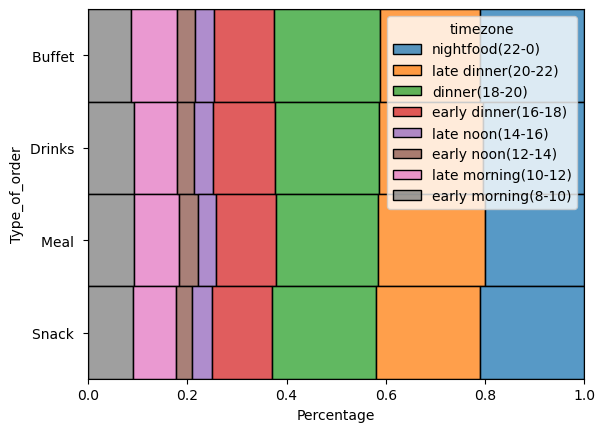

In [428]:
# Also we may check it by grouping ordered items

df4 = df.groupby(["Type_of_order","timezone","timeindex"])["ID"].count().reset_index(name="count")
df4 = df4.sort_values(["timeindex","count"],ascending=True).reset_index()
df4.drop(columns =["index"], inplace=True) 

df4 = df.sort_values(["timeindex"],ascending=False).reset_index()
ax = sns.histplot(y='Type_of_order', hue='timezone', multiple='fill', data=df4)
ax.set_xlabel('Percentage')
plt.show()

# Now we can see the amount of orders in sorted time periods in a day
# As we may see for all the item categories in orders, its the same distribution in a day
# The customers mostly orders item after 18:00 which can be associated with working hours.

In [429]:
#  Weather conndition values are grouped in order to see the weather effect on order distribution
df2 = df.groupby(["Weatherconditions"])["ID"].count().reset_index(name="count")
df2 = df2.sort_values("count",ascending=False).reset_index()
df2.drop(columns =["index"], inplace=True) 
df2.drop(df2.loc[df2['Weatherconditions']=='NaN'].index, inplace=True)

fig = px.bar( df2, x = "Weatherconditions",   y ="count" ,  title="Distribution according to weather")
fig.show()

# It can be inferred from below chart that the weather conditions have no particular effect on the order amount.

In [430]:
!pip install geopy
import geopy.distance as gpd

In [431]:
# lets calculate the distance between restaurants and delivery location by geopy module
df = df_backup
df_dist = df
# the distance can be found from the latitude and longitude values, then it will be placed in a new column
for i in range(len(df)):
    coords_1 = (df_dist['Restaurant_latitude'].iloc[i], df_dist['Restaurant_longitude'].iloc[i])
    coords_2 = (df_dist['Delivery_location_latitude'].iloc[i], df_dist['Delivery_location_longitude'].iloc[i])
    dist = gpd.geodesic(coords_1, coords_2).km
    #df.loc['distance'] = dist
    df_dist.at[i, 'distance'] = dist

df_dist.head(50)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),duration,timezone,timeindex,distance
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,...,Snack,motorcycle,0,No,Urban,24.0,15-30,late morning(10-12),1,3.020737
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,...,Snack,scooter,1,No,Metropolitian,33.0,30-45,dinner(18-20),5,20.143737
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,...,Drinks,motorcycle,1,No,Urban,26.0,15-30,early morning(8-10),0,1.549693
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-05-04,18:00:00,...,Buffet,motorcycle,1,No,Metropolitian,21.0,15-30,early dinner(16-18),4,7.774497
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,...,Snack,scooter,1,No,Metropolitian,30.0,15-30,early noon(12-14),2,6.197898
5,0x9bb4,HYDRES09DEL03,22,4.8,17.431668,78.408321,17.461668,78.438321,2022-11-03,21:20:00,...,Buffet,motorcycle,1,No,Urban,26.0,15-30,late dinner(20-22),6,4.602205
6,0x95b4,RANCHIRES15DEL01,33,4.7,23.369746,85.339820,23.479746,85.449820,2022-04-03,19:15:00,...,Meal,scooter,1,No,Metropolitian,40.0,30-45,dinner(18-20),5,16.576887
7,0x9eb2,MYSRES15DEL02,35,4.6,12.352058,76.606650,12.482058,76.736650,2022-03-14,17:25:00,...,Meal,motorcycle,1,No,Metropolitian,32.0,30-45,early dinner(16-18),4,20.164988
8,0x1102,HYDRES05DEL02,22,4.8,17.433809,78.386744,17.563809,78.516744,2022-03-20,20:55:00,...,Buffet,motorcycle,1,No,Metropolitian,34.0,30-45,late dinner(20-22),6,19.940219
9,0xcdcd,DEHRES17DEL01,36,4.2,30.327968,78.046106,30.397968,78.116106,2022-12-02,21:55:00,...,Snack,motorcycle,3,No,Metropolitian,46.0,45+,late dinner(20-22),6,10.271464


In [432]:
# it will be better if the distances are categorised by 5km for the analysis
df_temp = df_dist

df_temp.loc[(df_temp['distance'] > 0) & (df_temp['distance'] <= 5), 'distance_group'] = "0-5"
df_temp.loc[(df_temp['distance'] > 5) & (df_temp['distance'] <= 10), 'distance_group'] = "5-10"
df_temp.loc[(df_temp['distance'] > 10) & (df_temp['distance'] <= 15), 'distance_group'] = "10-15"
df_temp.loc[(df_temp['distance'] > 15), 'distance_group'] = "15+"

# then average delivery durations will be associated with the distance groups
df_temp = df_temp.groupby(["distance_group"])["Time_taken(min)"].mean().reset_index(name="avg")
df_temp = df_temp.sort_values("avg",ascending=False).reset_index()
df_temp.drop(columns =["index"], inplace=True) 
df_temp


fig = px.bar( df_temp, x = "distance_group",   y ="avg" ,  title="Delivery duration and delivery distance")
fig.show()
# According to the plot there is no correlation between delivery duration and distance

In [433]:
# Lets group the festival boolean in order to see if it has particular effect on orders
df5 = df.groupby(["Order_Date","Festival"])["ID"].count().reset_index(name="count").sort_values("Order_Date",ascending=True).reset_index()
df5.drop(columns =["index"], inplace=True)

In [434]:
fig = px.bar( df5, x = "Order_Date",   y ="count" , color = "Festival",  title="Delivery duration and delivery distance")
fig.update_xaxes(tickangle=45)
fig.show()

# It seems there is no correlation between festivals and order amount

,Time_taken(min),Avg_rating
Time_taken(min),1.000000,-0.723377
Avg_rating,-0.723377,1.000000


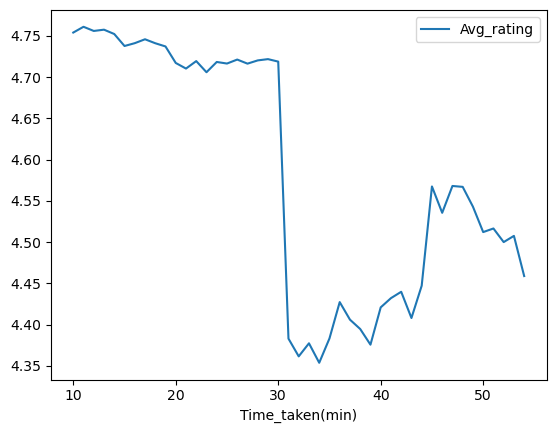

In [435]:
# So lets check the effect of delivery duration on the delivery rating
# now lets group by duration in minutes and get average rating results
df_t = df.groupby(["Time_taken(min)"])["Delivery_person_Ratings"].mean().reset_index(name="Avg_rating").sort_values("Time_taken(min)",ascending=True).reset_index()

# index column is unnecessary so its dropped
df_t.drop(columns =["index"], inplace=True) 

# lets see the correlation between delivery duration and star rating
lines = df_t.plot.line(x='Time_taken(min)', y='Avg_rating')
df_t.corr(method ='pearson')

    #RESULT
    # -0.72 means there is a very strong relationship between delivery duration and star rating,
    # if you increase one value, the other will probably go down.